In [1]:
import pandas as pd 
import numpy as np 
import random as rd 
from sklearn.decomposition import PCA 
from sklearn import preprocessing #gives functions for scaling the data before performing PCA 
import matplotlib.pyplot as plt 

In [2]:
PPMI = pd.read_excel('/Users/lynaelhaffaf/Documents/PPMI.xlsx')

In [3]:
PPMI.head()

,Unnamed: 0,SITE,PATNO,APPRDX,EVENT_ID,age,age_cat,gen,EDUCYRS,educ,...,frontal_middle_rostral_FoldIndR_DK_x,frontal_superior_FoldIndR_DK_x,parietal_superior_FoldIndR_DK_x,temporal_superior_FoldIndR_DK_x,parietal_supramarginal_FoldIndR_DK_x,frontal_pole_FoldIndR_DK_x,temporal_pole_FoldIndR_DK_x,temporal_transverse_FoldIndR_DK_x,insula_FoldIndR_DK_x,eTIV_x
0,0,10,3000,2,BL,69.1397,3,2,18,2,...,127,112,101,50,69,16,7,4,34.0,1.561952e+06
1,1,10,3001,1,BL,65.1425,2,1,16,2,...,138,123,82,58,81,10,9,7,36.0,1.705960e+06
2,2,10,3002,1,BL,67.5781,3,2,16,2,...,93,76,79,42,55,6,13,3,29.0,1.353961e+06
3,3,10,3003,1,BL,56.7178,2,2,16,2,...,117,93,76,58,54,13,8,6,30.0,1.571106e+06
4,4,10,3004,2,BL,59.4137,2,1,16,2,...,90,97,91,49,88,13,9,5,39.0,1.614622e+06


In [6]:
coi = ['APPRDX', 'frontal_middle_caudal_ThickL_DK_x', 'occipital_cuneus_ThickL_DK_x', 'temporal_entorhinal_ThickL_DK_x', 'temporal_fusiform_ThickL_DK_x']
PPMI = PPMI[coi]

In [7]:
scaled_data = preprocessing.scale(PPMI[coi])

In [8]:
pca = PCA()
pca.fit(scaled_data) #this is where we calculate the loading score and variation each PC accounts for 
pca_data = pca.transform(scaled_data)

In [9]:
per_var = np.round(pca.explained_variance_ratio_*100, decimals = 1)

#create labels for the scree plot
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

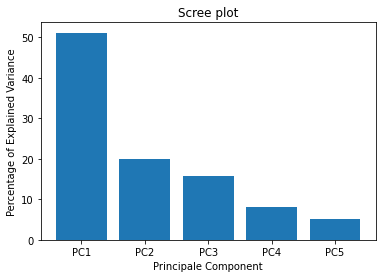

In [10]:
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label = labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principale Component')
plt.title('Scree plot')
plt.show()

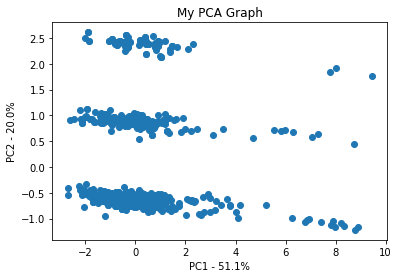

In [27]:
#draw a PCA plot 
pca_df = pd.DataFrame(pca_data, index = [PPMI.frontal_middle_caudal_ThickL_DK_x], columns = labels)
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

#Add sample names to the graph 
#for sample in pca_df.index:
 #   plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
plt.show()

In [33]:
#loading scores
loading_scores = pd.Series(pca.components_[0], index = coi)

#Taking absolute value
sorted_loading_scores = loading_scores.abs().sort_values(ascending = False)

#getting the names of top 10 indexes
top_10_genes= sorted_loading_scores[0:10].index.values
print(loading_scores[top_10_genes])

temporal_fusiform_ThickL_DK_x       -0.561509
frontal_middle_caudal_ThickL_DK_x   -0.537919
occipital_cuneus_ThickL_DK_x        -0.467004
temporal_entorhinal_ThickL_DK_x     -0.418114
APPRDX                               0.049378
dtype: float64
